## **HS Data Collection & EDA**
I found a <a href="https://hearthstonejson.com">nice free API for Hearthstone cards</a>. Let's get cooking.

I'm really not sure what to do, but maybe some linear regression or something.

<img src="https://art.hearthstonejson.com/v1/render/latest/enUS/256x/EX1_116.png">


In [1]:
import pandas as pd
from collect import get_cards

df = get_cards("https://api.hearthstonejson.com/v1/183433/enUS/cards.json")

In [2]:
df.columns

Index(['cardClass', 'dbfId', 'health', 'heroPowerDbfId', 'id', 'name', 'set',
       'type', 'artist', 'rarity', 'attack', 'cost', 'faction', 'collectible',
       'flavor', 'spellSchool', 'text', 'mechanics', 'race', 'races',
       'referencedTags', 'elite', 'targetingArrowText', 'durability',
       'overload', 'spellDamage', 'battlegroundsPremiumDbfId', 'techLevel',
       'collectionText', 'hasDiamondSkin', 'howToEarnGolden', 'armor',
       'howToEarn', 'hideCost', 'hideStats', 'mercenariesRole',
       'battlegroundsNormalDbfId', 'isBattlegroundsPoolMinion',
       'battlegroundsBuddyDbfId', 'battlegroundsHero', 'isBattlegroundsBuddy',
       'battlegroundsSkinParentId', 'battlegroundsDarkmoonPrizeTurn',
       'classes', 'puzzleType', 'multiClassGroup', 'isMiniSet',
       'mercenariesAbilityCooldown', 'questReward'],
      dtype='object')

In [3]:
df.value_counts

<bound method DataFrame.value_counts of          cardClass   dbfId  health  heroPowerDbfId   
0      DEMONHUNTER   91661    30.0         60224.0  \
1            DRUID   91662    30.0          1123.0   
2           SHAMAN  104998    30.0         74588.0   
3           HUNTER   91663    30.0           229.0   
4             MAGE   91664    30.0           807.0   
...            ...     ...     ...             ...   
27145      NEUTRAL   74925     NaN             NaN   
27146      NEUTRAL   61970     3.0             NaN   
27147      WARLOCK   61971     NaN             NaN   
27148      NEUTRAL   61972     9.0             NaN   
27149      NEUTRAL   61973     3.0             NaN   

                                          id                    name   
0            AIBot_DemonHunterTrainee_001_hb     DemonHunter Trainee  \
1                  AIBot_DruidTrainee_002_hb           Druid Trainee   
2      AIBot_Event_Ragnaros_FireFestival_02m  Fire Festival Ragnaros   
3                 AIBot

<img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExdmJwM25vY2hlaGJqdnp5dGJ0bGJ0cmFwdjYzMmMybWNnNDBpdW9heSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/j3IxJRLNLZz9sXR7ZA/giphy.gif">

ngl i had no idea the dataset would be this big

In [5]:
filtered_df = df.loc[:, ["cardClass", "health", "name", "set", "type", "rarity", "attack", "cost", "spellSchool", "text", "mechanics", "race", "races", "durability", "overload", "spellDamage", "classes"]]

In [6]:
filtered_df["type"].unique()

array(['HERO', 'MINION', 'SPELL', 'ENCHANTMENT', 'WEAPON', 'HERO_POWER',
       'MOVE_MINION_HOVER_TARGET', 'BATTLEGROUND_HERO_BUDDY',
       'BATTLEGROUND_QUEST_REWARD', 'LOCATION', 'LETTUCE_ABILITY', nan,
       'GAME_MODE_BUTTON'], dtype=object)

In [7]:
# We're only interested in spells, minions and weapons
df = filtered_df[df["type"].isin(["SPELL", "MINION", "WEAPON"])]

In [12]:
print(df.shape[0])
df.sample(n=5)

13687


,cardClass,health,name,set,type,rarity,attack,cost,spellSchool,text,mechanics,race,races,durability,overload,spellDamage,classes
7257,DRUID,NaN,Happy Hippie,BATTLE_OF_THE_BANDS,SPELL,NaN,NaN,1.0,NaN,<b>Discover</b> a Beast.,[DISCOVER],NaN,NaN,NaN,NaN,NaN,NaN
17736,NEUTRAL,3.0,Soul Seeker,REVENDRETH,MINION,COMMON,3.0,5.0,NaN,<b>Battlecry:</b> Swap this with a random mini...,[BATTLECRY],NaN,NaN,NaN,NaN,NaN,NaN
15001,NEUTRAL,10.0,Onyxian Whelp 3,LETTUCE,MINION,COMMON,10.0,6.0,NaN,NaN,NaN,DRAGON,[DRAGON],NaN,NaN,NaN,NaN
20808,NEUTRAL,20.0,Horde War Machine,DARKMOON_FAIRE,MINION,NaN,2.0,2.0,NaN,"<b>Taunt</b>\nAt the end of your turn, deal 1 ...","[DEATHRATTLE, TAUNT, TRIGGER_VISUAL]",NaN,NaN,NaN,NaN,NaN,NaN
8315,NEUTRAL,NaN,Cult of the Wolf,GILNEAS,SPELL,NaN,NaN,0.0,NaN,<b>Passive</b>\nYou can use your Hero Power tw...,[DUNGEON_PASSIVE_BUFF],NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df["cardClass"].unique(), df["cardClass"].nunique()

(array(['NEUTRAL', 'MAGE', 'HUNTER', 'PRIEST', 'WARLOCK', 'ROGUE', 'DRUID',
        'SHAMAN', 'WARRIOR', 'PALADIN', 'DEMONHUNTER', nan, 'DEATHKNIGHT',
        'DREAM'], dtype=object),
 13)

As of 2023, there are 11 class cards + neutral cards. We also have dream cards, but those are very few:

In [14]:
df[df["cardClass"] == "DREAM"].shape[0]

10

For starters we're going to focus on one class. I have chosen <a href="https://www.reddit.com/r/classicwow/comments/d9wc9v/when_i_see_people_in_desolace_asking_for_rexxar/?utm_source=share&utm_medium=web2x&context=3">Hunter</a>.

In [26]:
all_hunter_cards = filtered_df[filtered_df["cardClass"] == "HUNTER"]
all_hunter_cards["rarity"].value_counts()

rarity
COMMON       151
RARE         133
FREE          68
LEGENDARY     67
EPIC          65
Name: count, dtype: int64

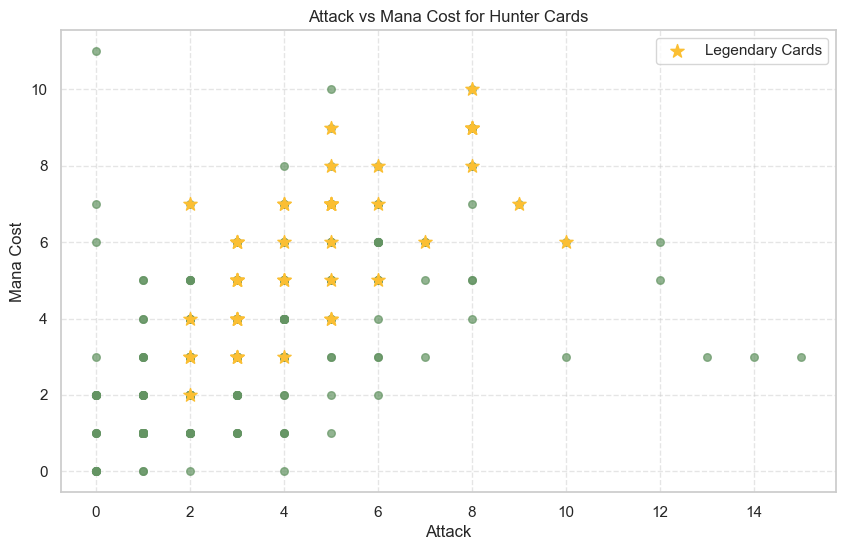

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.sans-serif"] = "Noto Sans"

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.scatter(all_hunter_cards["attack"], all_hunter_cards["cost"], color='#649463', alpha=0.7, s=30)
plt.scatter(all_hunter_cards[all_hunter_cards["rarity"] == "LEGENDARY"]["attack"],
            all_hunter_cards[all_hunter_cards["rarity"] == "LEGENDARY"]["cost"],
            color='#fbbf33', marker='*', s=100, label='Legendary Cards')
            
plt.xlabel("Attack")
plt.ylabel("Mana Cost")
plt.title("Attack vs Mana Cost for Hunter Cards")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# for index, row in all_hunter_cards.iterrows():
#     if row["rarity"] == "LEGENDARY":
#         plt.annotate(row["name"], (row["attack"], row["cost"]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)


plt.show()

Interesting, there's a card with a cost of 11.

In [48]:
all_hunter_cards[all_hunter_cards["cost"] == 11]

,cardClass,health,name,set,type,rarity,attack,cost,spellSchool,text,mechanics,race,races,durability,overload,spellDamage,classes
20726,HUNTER,1.0,Alleria Windrunner,DARKMOON_FAIRE,MINION,NaN,0.0,11.0,NaN,<b>Dormant</b>,"[TRIGGER_VISUAL, UNTOUCHABLE]",NaN,NaN,NaN,NaN,NaN,NaN


The data needs more cleaning. All cards should be marked with rarity, we can remove all rows with missing values.

In [49]:
df_cleaned = df.dropna(subset=["rarity"])

In [50]:
df["set"].unique()

array(['TB', 'TGT', 'HERO_SKINS', 'ALTERAC_VALLEY', 'THE_BARRENS',
       'SCHOLOMANCE', 'LETTUCE', 'LEGACY', 'BATTLEGROUNDS', 'GANGS',
       'BATTLE_OF_THE_BANDS', 'NAXX', 'GILNEAS', 'ICECROWN',
       'LOOTAPALOOZA', 'OG', 'RETURN_OF_THE_LICH_KING', 'STORMWIND',
       'EXPERT1', 'ULDUM', 'BOOMSDAY', 'BLACK_TEMPLE', 'BASIC', 'DALARAN',
       'DARKMOON_FAIRE', 'GVG', 'LOE', 'CORE', 'UNGORO', 'BRM',
       'DEMON_HUNTER_INITIATE', 'PLACEHOLDER_202204', nan, 'CREDITS',
       'DRAGONS', 'YEAR_OF_THE_DRAGON', 'KARA', 'REVENDRETH', 'TROLL',
       'PATH_OF_ARTHAS', 'THE_SUNKEN_CITY', 'VANILLA', 'TAVERNS_OF_TIME',
       'TITANS', 'MISSIONS'], dtype=object)

In [51]:
df = df.drop(df[(df["set"] == "HERO_SKINS") | (df["set"] == "MISSIONS")].index)
df = df.drop(df[(df["set"] == "LETTUCE") | (df["set"] == "PLACEHOLDER_202204")].index)
df = df.drop(df[(df["set"] == "BATTLEGROUNDS")].index)

## **Aggregation**

In [52]:
max_health_by_cardClass = df.groupby("cardClass").health.max()
max_attack_by_cardClass = df.groupby("cardClass").attack.max()
max_cost_by_cardClass = df.groupby("cardClass").cost.max()

aggregated_df = pd.DataFrame({
    "cardClass": max_health_by_cardClass.index,
    "max_health": max_health_by_cardClass,
    "max_attack": max_attack_by_cardClass,
    "max_cost": max_cost_by_cardClass
})

aggregated_df

,cardClass,max_health,max_attack,max_cost
cardClass,,,,
DEATHKNIGHT,DEATHKNIGHT,9.0,9.0,11.0
DEMONHUNTER,DEMONHUNTER,10.0,10.0,13.0
DREAM,DREAM,6.0,7.0,4.0
DRUID,DRUID,12.0,12.0,11.0
HUNTER,HUNTER,15.0,12.0,11.0
MAGE,MAGE,50.0,10.0,11.0
NEUTRAL,NEUTRAL,999.0,100.0,50.0
PALADIN,PALADIN,30.0,10.0,25.0
PRIEST,PRIEST,10.0,8.0,12.0


In [53]:
df[df["cardClass"] == "NEUTRAL"].sort_values(by="health", ascending=False).head(10)

,cardClass,health,name,set,type,rarity,attack,cost,spellSchool,text,mechanics,race,races,durability,overload,spellDamage,classes
719,NEUTRAL,999.0,???,THE_BARRENS,MINION,NaN,1.0,0.0,NaN,<b>???</b>,[RUSH],NaN,NaN,NaN,NaN,NaN,NaN
707,NEUTRAL,999.0,???,THE_BARRENS,MINION,NaN,0.0,0.0,NaN,<b>???</b>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
708,NEUTRAL,999.0,???,THE_BARRENS,MINION,NaN,1.0,0.0,NaN,<b>???</b>,[RUSH],NaN,NaN,NaN,NaN,NaN,NaN
6855,NEUTRAL,300.0,"Galakrond, Progenitor of Dragons",YEAR_OF_THE_DRAGON,MINION,NaN,5.0,8.0,NaN,<b>Mega-Windfury</b>.\nAlso damages the minion...,NaN,DRAGON,[DRAGON],NaN,NaN,NaN,NaN
23390,NEUTRAL,200.0,Nefarian,TB,MINION,LEGENDARY,0.0,10.0,NaN,Can't be targeted by spells.\n<b>Boss: </b>Nef...,"[TAUNT, InvisibleDeathrattle]",DRAGON,[DRAGON],NaN,NaN,NaN,NaN
23385,NEUTRAL,200.0,Nefarian,TB,MINION,LEGENDARY,0.0,10.0,NaN,Can't be targeted by spells.\n<b>Boss: </b>Nef...,"[TAUNT, InvisibleDeathrattle]",DRAGON,[DRAGON],NaN,NaN,NaN,NaN
23389,NEUTRAL,200.0,Nefarian,TB,MINION,LEGENDARY,0.0,10.0,NaN,Can't be targeted by spells.\n<b>Boss: </b>Nef...,"[TAUNT, InvisibleDeathrattle]",DRAGON,[DRAGON],NaN,NaN,NaN,NaN
7018,NEUTRAL,100.0,Dragonslayer Skruk,YEAR_OF_THE_DRAGON,MINION,NaN,12.0,10.0,NaN,<b>Frozen.</b>\n<i>Lazul is attempting to free...,[IGNORE_HIDE_STATS_FOR_BIG_CARD],NaN,NaN,NaN,NaN,NaN,NaN
2753,NEUTRAL,100.0,Anetheron,STORMWIND,MINION,NaN,5.0,8.0,NaN,<b>Mega-Windfury</b>.\nAlso damages the minion...,NaN,DEMON,[DEMON],NaN,NaN,NaN,NaN
9241,NEUTRAL,100.0,Kill Objective: Anub'arak,TB,MINION,NaN,1.0,0.0,NaN,Wreaks havoc at the beginning of each turn. I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Well, there are clearly some deviants in here, especially in the neutral card pool.<br>
I think most of these are from Mercenaries game mode. We're not interested in those.

#### If I'd spent less than a minute on the <a href="https://hearthstonejson.com/docs/cards.html">API documentation</a> I would've found that:

>cards.collectible.json is a restricted set which contains only collectible cards (cards which will show up in your collection and the base heroes). Please use this set if you do not need non-collectible cards in your app.

<img src="https://i.kym-cdn.com/photos/images/newsfeed/001/853/183/098.gif">

In [57]:
# Let's redo it.
df = get_cards("https://api.hearthstonejson.com/v1/183433/enUS/cards.collectible.json")

df = df.loc[df["collectible"] == True]
df = df.loc[:, ["cardClass", "health", "name", "set", "type", "rarity", "attack", "cost", "spellSchool", "text", "mechanics", "race", "races", "durability", "overload", "spellDamage", "classes"]]
df = df.drop(df[df["type"] == "HERO"].index) # Drop Hero cards
df_cleaned = df.dropna(subset=["rarity"]) # Drop any missing values

In [58]:
df[df["cardClass"] == "NEUTRAL"].sort_values(by="health", ascending=False).head(10)

,cardClass,health,name,set,type,rarity,attack,cost,spellSchool,text,mechanics,race,races,durability,overload,spellDamage,classes
13756,NEUTRAL,20.0,The Darkness,LOOTAPALOOZA,MINION,LEGENDARY,20.0,4.0,NaN,[x]Starts <b>Dormant</b>.\n<b>Battlecry:</b> S...,[BATTLECRY],NaN,NaN,NaN,NaN,NaN,NaN
26359,NEUTRAL,14.0,Ultrasaur,UNGORO,MINION,COMMON,7.0,10.0,NaN,NaN,NaN,BEAST,[BEAST],NaN,NaN,NaN,NaN
24395,NEUTRAL,14.0,Mosh'Ogg Enforcer,TROLL,MINION,COMMON,2.0,8.0,NaN,<b>Taunt</b>\n<b>Divine Shield</b>,"[DIVINE_SHIELD, TAUNT]",NaN,NaN,NaN,NaN,NaN,NaN
8190,NEUTRAL,12.0,Witchwood Grizzly,GILNEAS,MINION,RARE,3.0,5.0,NaN,[x]<b>Taunt</b>\n<b>Battlecry:</b> Lose 1 Heal...,"[BATTLECRY, TAUNT]",BEAST,[BEAST],NaN,NaN,NaN,NaN
18252,NEUTRAL,12.0,"Deathwing, Dragonlord",OG,MINION,LEGENDARY,12.0,10.0,NaN,<b>Deathrattle:</b> Put all Dragons from your ...,[DEATHRATTLE],DRAGON,[DRAGON],NaN,NaN,NaN,NaN
5620,NEUTRAL,12.0,Batterhead,DALARAN,MINION,EPIC,3.0,8.0,NaN,<b>Rush</b>. After this attacks and kills a mi...,"[RUSH, TRIGGER_VISUAL]",NaN,NaN,NaN,NaN,NaN,NaN
26965,NEUTRAL,12.0,Deathwing,VANILLA,MINION,LEGENDARY,12.0,10.0,NaN,<b>Battlecry:</b> Destroy all other minions an...,[BATTLECRY],DRAGON,[DRAGON],NaN,NaN,NaN,NaN
19289,NEUTRAL,12.0,Red Herring,REVENDRETH,MINION,COMMON,3.0,7.0,NaN,[x]<b>Taunt</b>\nYour non-Red Herring\nminions...,"[AURA, TAUNT]",BEAST,[BEAST],NaN,NaN,NaN,NaN
4115,NEUTRAL,12.0,Magtheridon,BLACK_TEMPLE,MINION,LEGENDARY,12.0,4.0,NaN,[x]<b>Dormant</b>. <b>Battlecry:</b> Summon\nt...,[BATTLECRY],DEMON,[DEMON],NaN,NaN,NaN,NaN
4945,NEUTRAL,12.0,Sleepy Dragon,CORE,MINION,COMMON,4.0,9.0,NaN,<b>Taunt</b>,[TAUNT],DRAGON,[DRAGON],NaN,NaN,NaN,NaN


Much better. We should also drop some more sets.

In [61]:
df = df.drop(df[(df["set"] == "HERO_SKINS") | (df["set"] == "MISSIONS")].index)
df = df.drop(df[(df["set"] == "LETTUCE") | (df["set"] == "PLACEHOLDER_202204")].index)
df = df.drop(df[(df["set"] == "BATTLEGROUNDS")].index)
df = df[df["set"].notnull()]

## What values have changed throughout expansions?
#### A Hunter example.

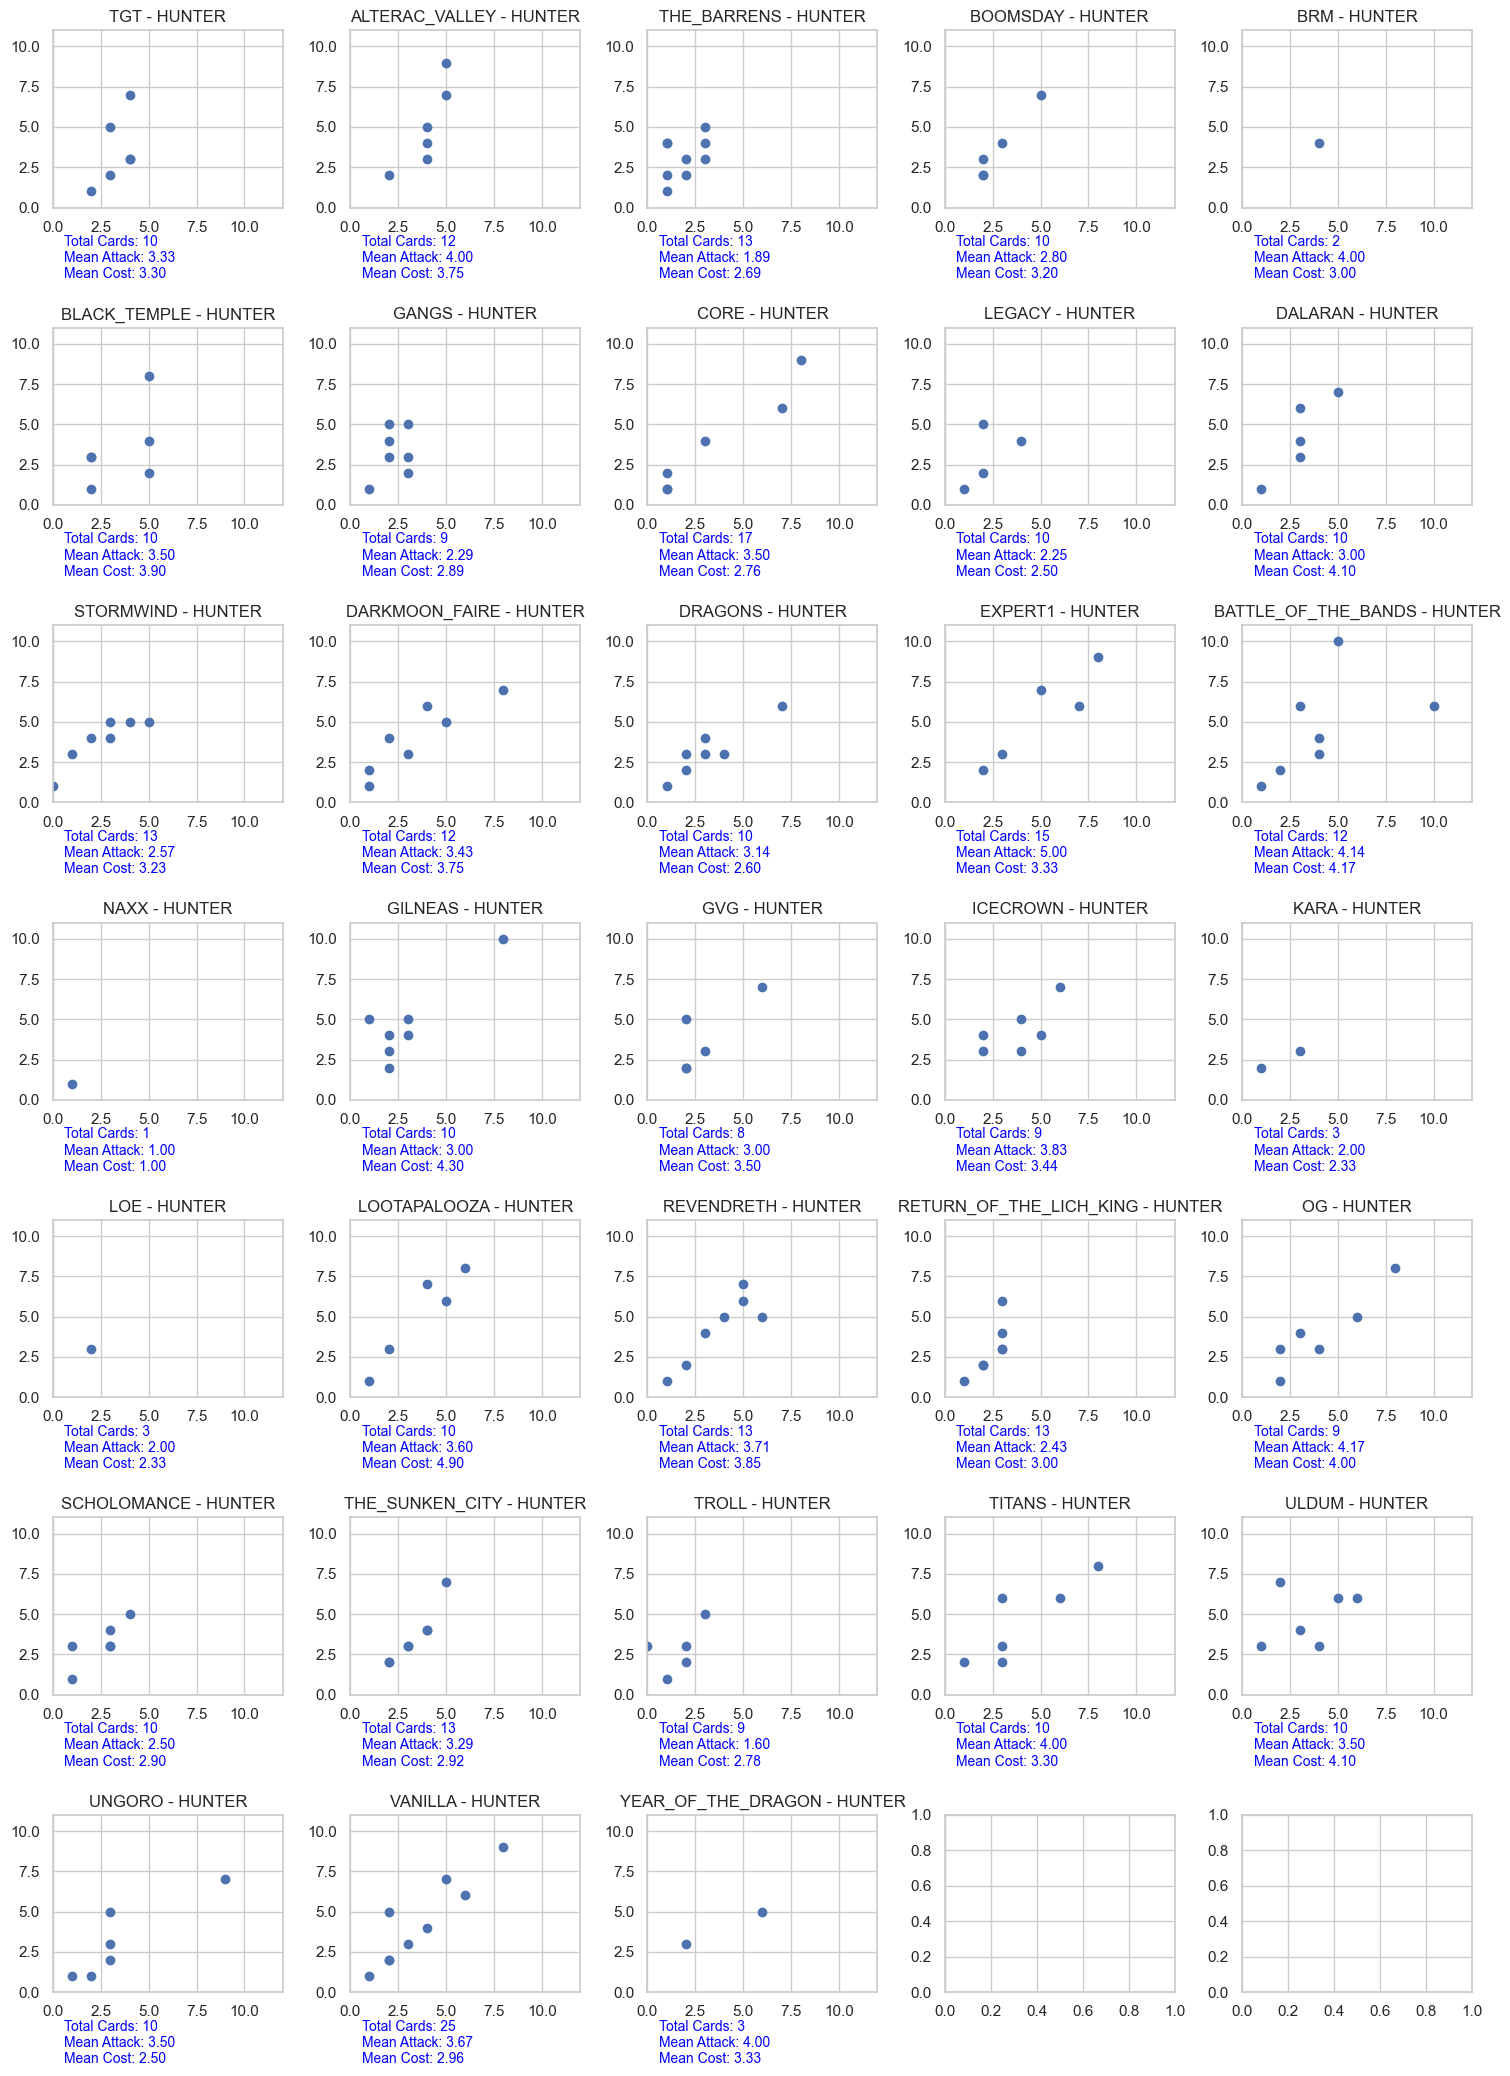

In [69]:
def plot_cards(ax, df, set_name, hero_class):
    df_subset = df[(df["cardClass"] == hero_class) & (df["set"] == set_name)]
    #df_subset = df_subset.dropna(subset=["attack", "cost"])
    
    ax.scatter(df_subset["attack"], df_subset["cost"])
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 11)
    ax.set_title(f"{set_name} - {hero_class}")

    num_cards = df_subset.shape[0]
    mean_attack = df_subset["attack"].mean()
    mean_cost = df_subset["cost"].mean()
    #atk_ratio = mean_attack / mean_cost # not a very good measure in this scenario
    
    ax.text(0.05, -0.4,
    f"Total Cards: {num_cards}\nMean Attack: {mean_attack:.2f}\nMean Cost: {mean_cost:.2f}", 
            transform=ax.transAxes, fontsize=10, color='blue')

unique_sets = df[df["cardClass"] == "HUNTER"]["set"].unique()

fig, axes = plt.subplots(7, 5, figsize=(15, 21))
axes = axes.flatten()

for i, set_name in enumerate(unique_sets):
    if i < 35:
        plot_cards(axes[i], df, set_name, "HUNTER")

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

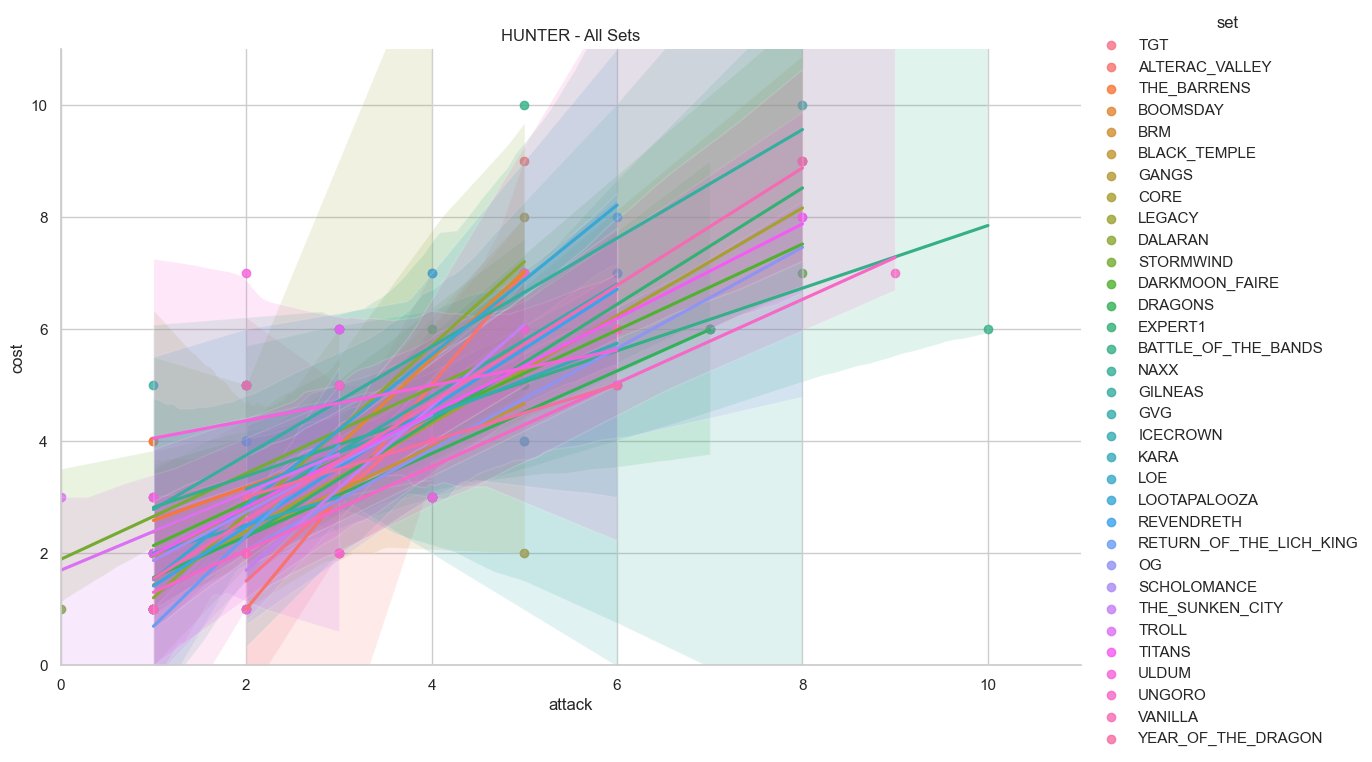

In [65]:
def plot_lm(df, hero_class):
    df_subset = df[df["cardClass"] == hero_class]
    df_subset = df_subset.dropna(subset=["attack", "cost"])
    
    sns.lmplot(x="attack", y="cost", hue="set", data=df_subset, height=7, aspect=1.6)
    plt.xlim(0, 11)
    plt.ylim(0, 11)
    plt.title(f"{hero_class} - All Sets")

unique_sets = df[df["cardClass"] == "HUNTER"]["set"].unique()

fig = plt.figure(figsize=(12, 8))
plot_lm(df, "HUNTER")

plt.show()

Yikes, that's hard to read. Although some expansions have seen cards with higher attack values in relation to its cost, it's a pretty linear relation. However we could make some better distinctions of value.

## **Welcome to Value Town.**

<img src="https://static.wikia.nocookie.net/hearthstun/images/b/b1/Learn.jpg/revision/latest/scale-to-width-down/251?cb=20180519163437">

<a href="https://hearthstun.fandom.com/wiki/Trump">Mayor of Value Town</a>

In [70]:
hunter_df = df[df["cardClass"] == "HUNTER"].copy()  # copy to avoid the SettingWithCopyWarning

hunter_df["value"] = hunter_df["attack"] / hunter_df["cost"]

highest_value_index = hunter_df["value"].idxmax()
highest_value_card = hunter_df.loc[highest_value_index]

print("Card with Highest Value (Attack-to-Cost Ratio):")
print(highest_value_card)

Card with Highest Value (Attack-to-Cost Ratio):
cardClass                                                 HUNTER
health                                                       4.0
name                                           Imprisoned Felmaw
set                                                 BLACK_TEMPLE
type                                                      MINION
rarity                                                    COMMON
attack                                                       5.0
cost                                                         2.0
spellSchool                                                  NaN
text           [x]<b>Dormant</b> for 2 turns.\nWhen this awak...
mechanics                                                    NaN
race                                                       DEMON
races                                                    [DEMON]
durability                                                   NaN
overload                                  

In [71]:
lowest_value_index = hunter_df["value"].idxmin()
lowest_value_card = hunter_df.loc[lowest_value_index]

print("Card with Lowest Value (Attack-to-Cost Ratio):")
print(lowest_value_card)

Card with Lowest Value (Attack-to-Cost Ratio):
cardClass                                                 HUNTER
health                                                       NaN
name                                          Leatherworking Kit
set                                                    STORMWIND
type                                                      WEAPON
rarity                                                      RARE
attack                                                       0.0
cost                                                         1.0
spellSchool                                                  NaN
text           [x]After three friendly\nBeasts die, draw a Be...
mechanics                                       [TRIGGER_VISUAL]
race                                                         NaN
races                                                        NaN
durability                                                   3.0
overload                                   

The devil in in the fineprint, or in this case, the card text. Card text (or mechanics) can have positive *or* negative impact on the overall value. For example, Imprisoned Felmaw is dormant for 2 turns and attacks a random enemy when awaken. Things like this must be taken into consideration when determining the value, so before we crunch numbers, we gotta quantify and aggregate.


Let's specifically take look on minions, as we in the above example compared a minion to a weapon in terms of highest and lowest *value*.



In [77]:
minion_hunter_df = df[(df["cardClass"] == "HUNTER") & (df["type"] == "MINION")].copy()

<Figure size 1000x600 with 0 Axes>

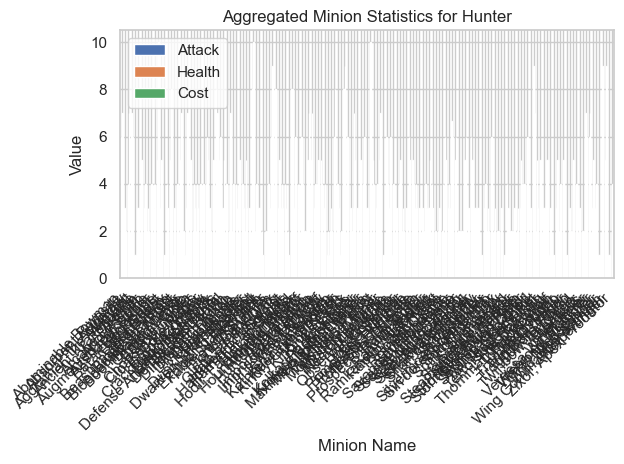

In [78]:
aggregated_data = minion_hunter_df.groupby("name").agg({"attack": "mean", "health": "mean", "cost": "mean"})

plt.figure(figsize=(10, 6))
aggregated_data.plot(kind="bar")
plt.title("Aggregated Minion Statistics for Hunter")
plt.xlabel("Minion Name")
plt.ylabel("Value")
plt.legend(["Attack", "Health", "Cost"])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

Hmm, imma need a wider screen.